In [1]:
import numpy as np

In [161]:
Delta = np.array([0.1084,0.1008,0.1047])*1e3
Deltaerr = np.array([0.0022,0.0011,0.0015])*1e3
Delta2 = np.array([0.1014,0.0974,0.0999])*1e3
Deltaerr2 = np.array([0.0011,0.0012,0.0018])*1e3

In [175]:
D1 = np.mean(Delta)
D2 = np.mean(Delta2)
Derr1 = np.std(Delta)
Derr2 = np.std(Delta2)

num = (D1/(Derr1**2)) + (D2/(Derr2**2))
den = 1/(Derr1**2) + 1/(Derr2**2)

m = num/den
s = np.sqrt(1/den)
print(s)

1.4567896952082449


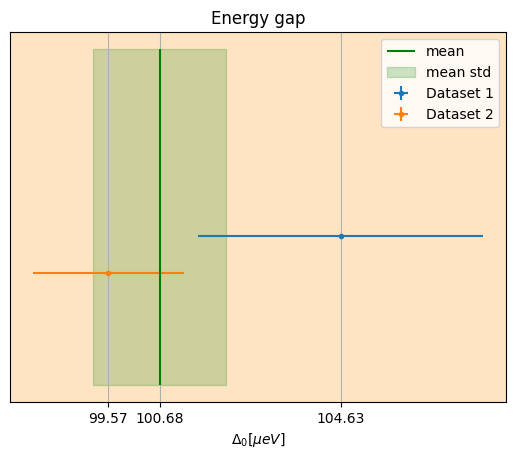

In [174]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

y = np.arange(0,10,1)
plt.errorbar(D1,y[4], xerr=Derr1,yerr=0, fmt='.', label='Dataset 1')
plt.errorbar(D2,y[3], xerr=Derr2,yerr=0, fmt='.', label='Dataset 2')
plt.vlines(m,min(y),max(y),color='green',label='mean')
plt.fill_betweenx(y,m-s,m+s, alpha=0.2, color='green', label='mean std')
plt.xlabel(r'$\Delta_{0} [\mu eV]$')
plt.title('Energy gap')
plt.grid(True)
plt.yticks([])
fig = plt.gca()
fig.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))  # Set format to one decimal place
fig.set_facecolor('bisque')
plt.xticks([D1,m,D2])
plt.legend()
plt.grid(True)


In [177]:
from scipy import constants as c
T_c = (2*m*c.eV)/(3.5*c.Boltzmann)*1e-3
Terr = (2*s*c.eV)/(3.5*c.Boltzmann)*1e-3
print('T_c '+f"{T_c:.4f}" + " +/- "+f"{Terr:.4f}"+" mK")

T_c 667.6469 +/- 9.6602 mK


In [178]:
from scipy import stats

# Sample data for two groups
group1 = Delta
group2 = Delta2

# Perform T-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")


T-statistic: 2.038845498799276
P-value: 0.11108932572204101
Fail to reject the null hypothesis: There is no significant difference between the two groups.
